# Step 1: Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Step 2: Load and Preprocess the Data

In [2]:
#Load the MNIST dataset and preprocess it
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Step 3: Visualize the Data

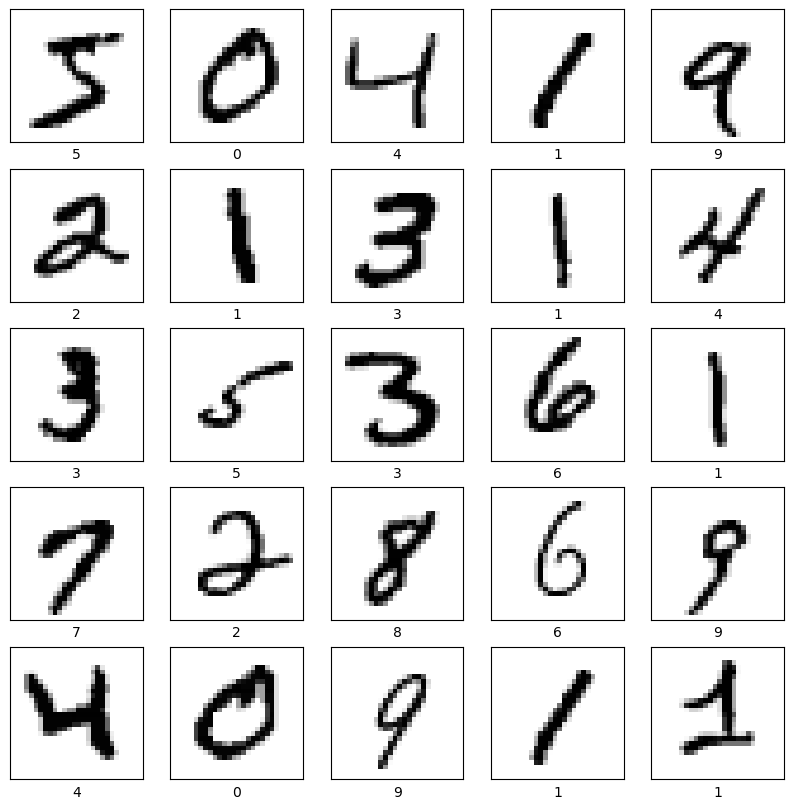

In [3]:
#Visualize the training data to get a better understanding of the input images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

# Step 4: Build the CNN Model

In [4]:
#Create a CNN model using TensorFlow's Keras API:
model = models.Sequential()
model.add(layers.Reshape((28, 28, 1), input_shape=(28, 28)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Step 5: Compile and Train the Model

In [5]:
#Compile the model with an appropriate optimizer and loss function, and train it on the training data
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1383 - accuracy: 0.9581 - val_loss: 0.0560 - val_accuracy: 0.9825
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0473 - accuracy: 0.9853 - val_loss: 0.0459 - val_accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0339 - accuracy: 0.9892 - val_loss: 0.0320 - val_accuracy: 0.9902
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0253 - accuracy: 0.9918 - val_loss: 0.0279 - val_accuracy: 0.9900
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0187 - accuracy: 0.9939 - val_loss: 0.0296 - val_accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 0.0298 - val_accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.0327 -

# Step 6: Evaluate the Model

In [6]:
#Evaluate the trained model on the test data to see its performance
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 2s - loss: 0.0314 - accuracy: 0.9905 - 2s/epoch - 5ms/step
Test accuracy: 0.9904999732971191


# Step 7: Make Predictions

313/313 [==============================] - 2s 5ms/step
Predicted label: 7
Actual label: 7


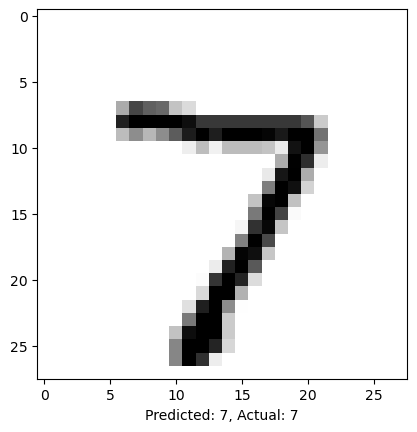

Predicted label: 2
Actual label: 2


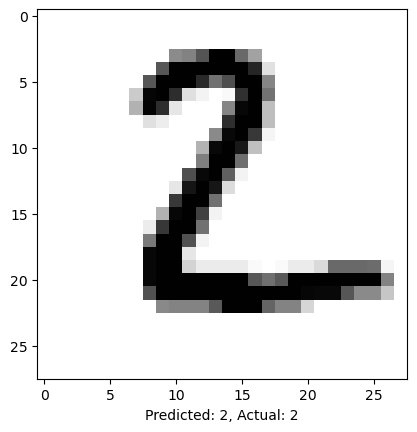

Predicted label: 1
Actual label: 1


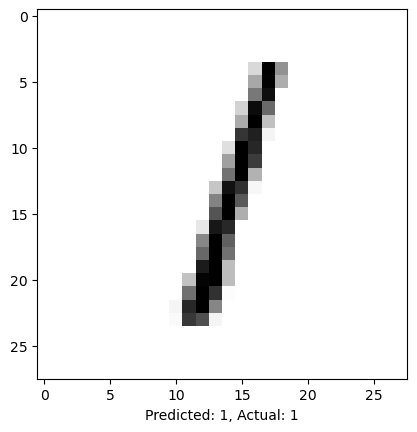

Predicted label: 0
Actual label: 0


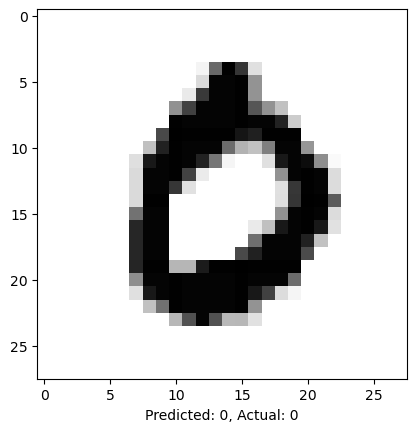

Predicted label: 4
Actual label: 4


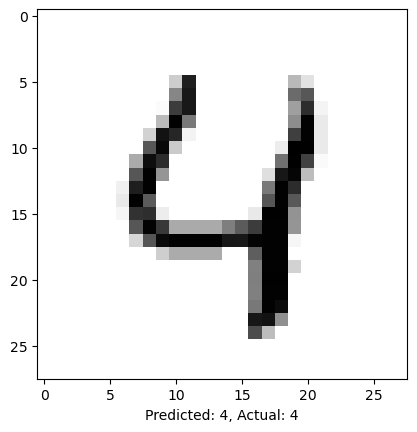

Predicted label: 1
Actual label: 1


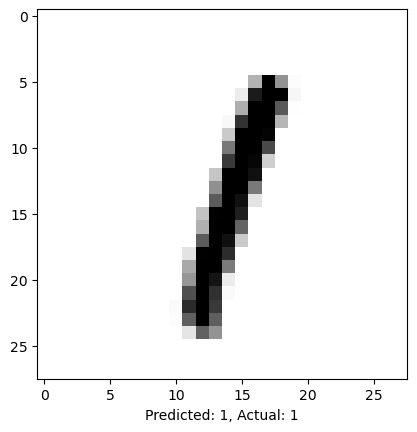

Predicted label: 4
Actual label: 4


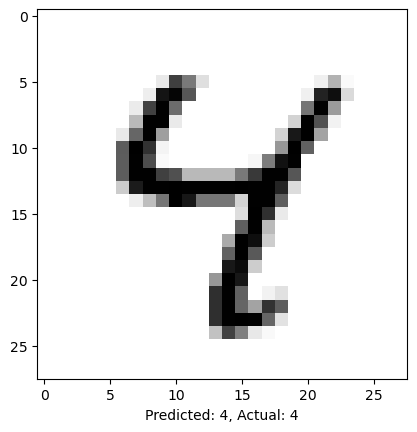

Predicted label: 9
Actual label: 9


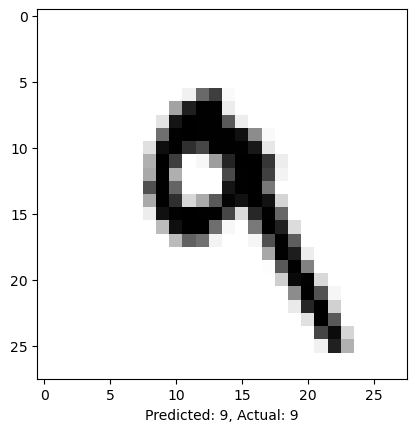

Predicted label: 5
Actual label: 5


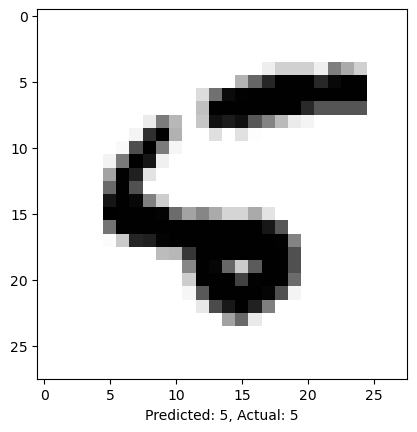

Predicted label: 9
Actual label: 9


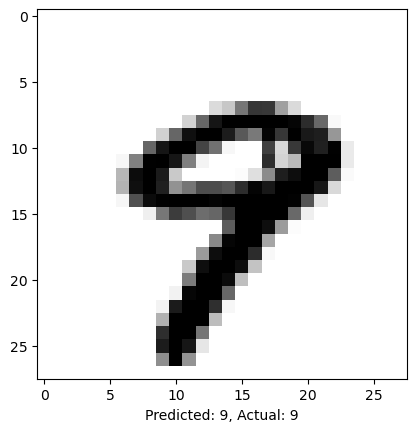

In [7]:
#Use the trained model to make predictions on new, unseen data, and check if the predictions are correct
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1).numpy()

# Example: Checking predictions for the first 10 test images
for i in range(10):
    predicted_label = predicted_labels[i]
    actual_label = test_labels[i]

    print("Predicted label:", predicted_label)
    print("Actual label:", actual_label)

    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Predicted: " + str(predicted_label) + ", Actual: " + str(actual_label))
    plt.show()